In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

### Business Problem



This project focuses on prediction of student's performance based on some factors such as gender , race, level of education and so on

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), os.listdir(os.getcwd())[-2]))

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


 ###### some data types are strings type like gender, race, level of education while some data types are integers like math score, reading score and writing score/

In [4]:
data.isna().sum() # check for missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values from this columns

In [5]:
#checking satistical information about the numerical columns

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 Average score in maths is 66, 69.16 for reading score and 68 for writing score,  the closest scoore between any two students is just 15 points far. there scores are not that far from each other

### Data Exploration

#### Does Parent level of Education affect the performance of students in maths?

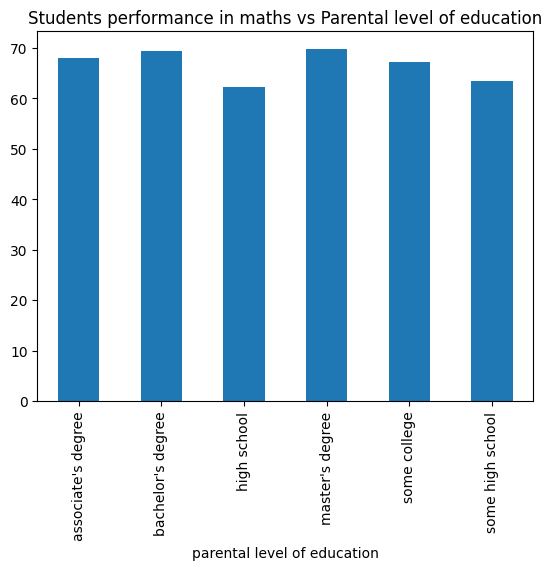

In [7]:
data.groupby('parental level of education')["math score"].mean().plot(kind = "bar")
plt.title("Students performance in maths vs Parental level of education");

Parent's level of education have no influence on the performance of the student in maths

 Does The type of gender affect the performance of the students??

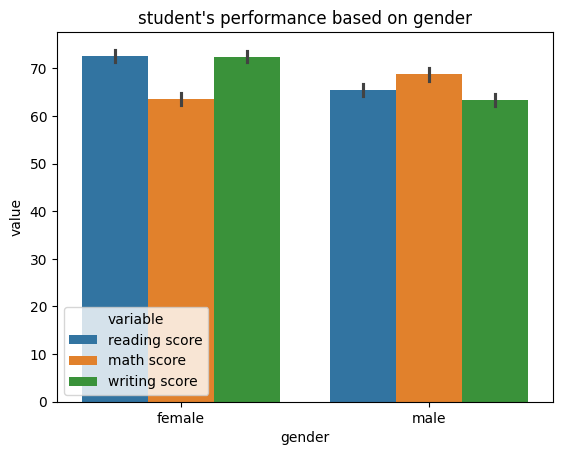

In [289]:
df_melted = pd.melt(data, id_vars='gender', value_vars=['reading score', 'math score', 'writing score'])

sb.barplot(x='gender', y='value', hue='variable', data=df_melted)
plt.title("student's performance based on gender")
plt.show()

Female students outperformed the male students in all subjects except in maths where the male students scored slightly higher than the female students

### How does student performed based on their ethnic groups?

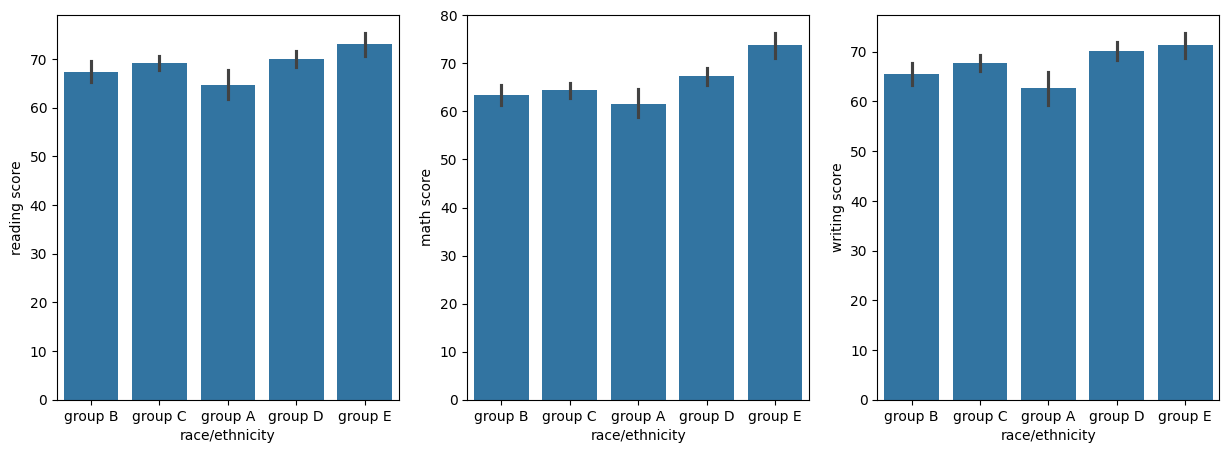

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.barplot(x='race/ethnicity', y='reading score', data=data, ax=axes[0])
sb.barplot(x='race/ethnicity', y='math score', data=data, ax=axes[1])
sb.barplot(x='race/ethnicity', y='writing score', data=data, ax=axes[2])

plt.show()

students from ethnic group were areguably the best across all subjeccts 

Is test preparation a determinant for student performance in the actual exams?

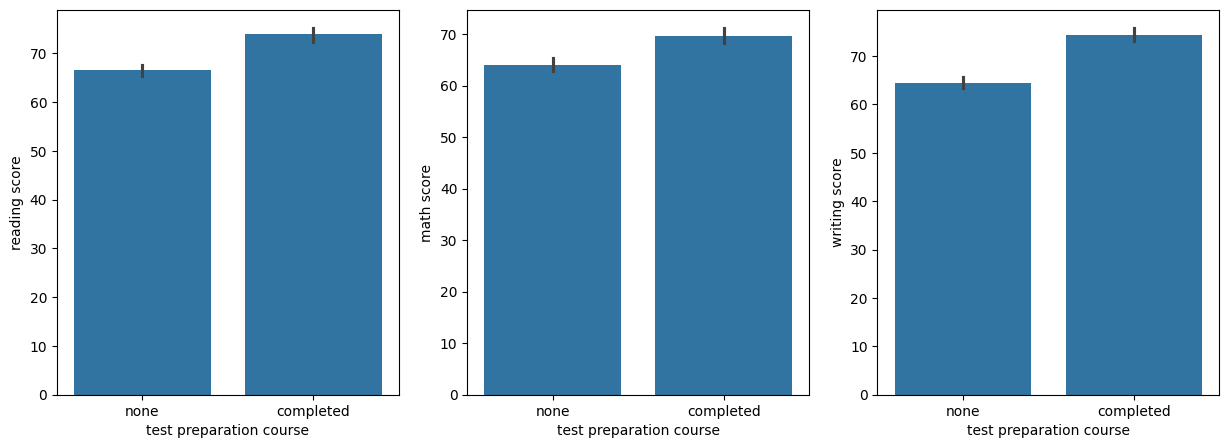

In [291]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.barplot(x='test preparation course', y='reading score', data=data, ax=axes[0])
sb.barplot(x='test preparation course', y='math score', data=data, ax=axes[1])
sb.barplot(x='test preparation course', y='writing score', data=data, ax=axes[2])

plt.show()

students who have completed their test score performed better in all subjects than others.

## Does lunch type affect performance of students ?

<Axes: xlabel='lunch', ylabel='writing score'>

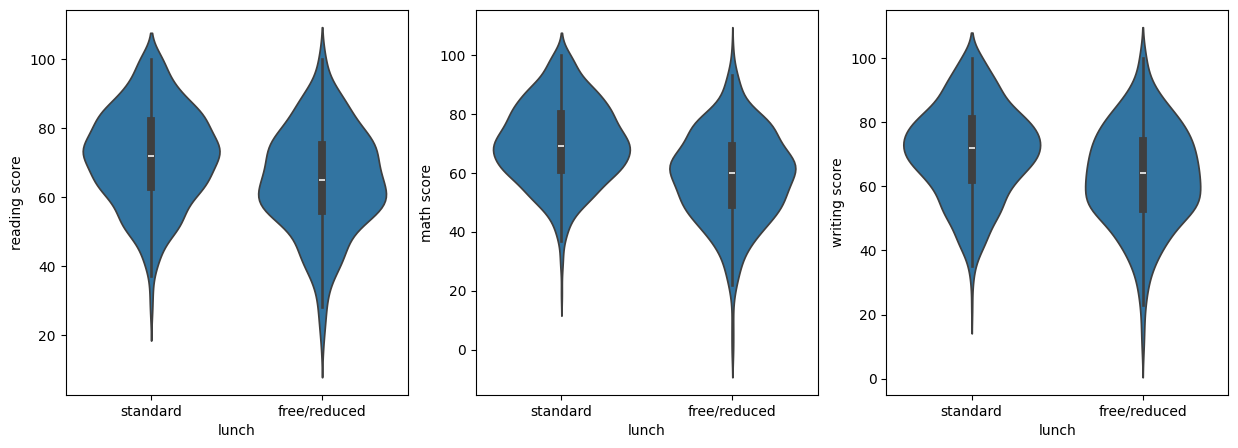

In [26]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.violinplot(x='lunch', y='reading score', data=data, ax=axes[0])
sb.violinplot(x='lunch', y='math score', data=data, ax=axes[1])
sb.violinplot(x='lunch', y='writing score', data=data, ax=axes[2])


##  Checking  the correlations between students performance across all subject ?

One would argue that, does a a student performing well in a certain subject neccesarily indicate they would perform better in other subjects?

Furthermore, does a student performance in Math indicates they will score higher in Reading or writting??

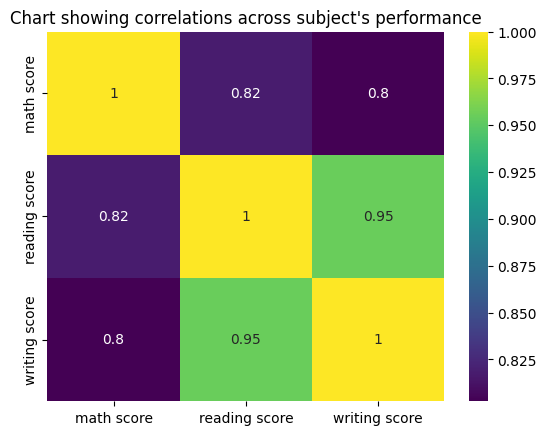

In [25]:
sb.heatmap(corr_data, cmap="viridis", annot= True)
plt.title("Chart showing correlations across subject's performance");

This indicates that there is a strong correlations across subjects, ie, a student performing well in math have a strong chances of performing in other subjects too.

# Final observations

1. Average scores in all subject is between 66 and 69
2. Female students outperformed male students in all subject excep in math.
3. Parents level of education doesnt influence their children's performance.
4. students who have completed their test score have higher chances of performing well in subjects.
5. Ethic group D performed well in subjects, we cant really say ethnic group is a key factor in assessing the performance of student
6. the categorical columns would  be transformed using one-hot-encoding

### Also good to share some mathematical background


its also good to visualize how the function works in linear space, here I have demonstrated this below

Y = M * x + E   will be transformed into 


math score)  = B* Gender + B * Ethnic + B * lunch + B * test completed + B*level of education + B * Reading scores + B * Writing score + E


where Y = math score - dependent variable


B = M and E are parameter - M measures the coeficient of independent variables while E measure the cost function or Error


Independent variables are Gender, Ethnic grp, Lunch, test completed and level of Education, Reading score, writing score



